In [1]:
import numpy as np
from matplotlib import pyplot as plt
from dadi.Polyploids import wrightfisher as WF

Allelic WF Model Results Summary
Subgenome A Results
Proportion of retained density: 0.56619
Mean final allele frequency: 0.3864109751143609
Variance of final allele frequency: 0.09197928437485763


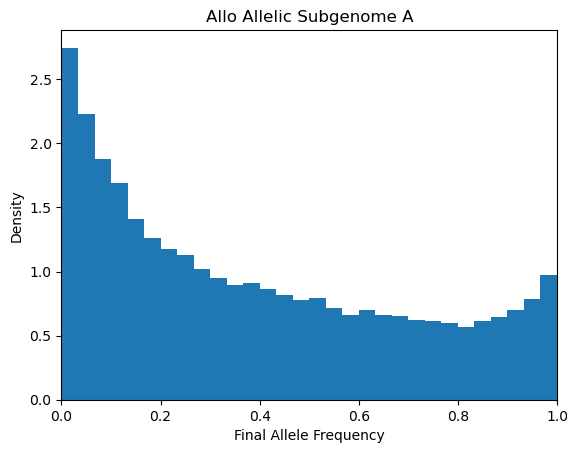

Subgenome B Results
Proportion of retained density: 0.63653
Mean final allele frequency: 0.671321257442697
Variance of final allele frequency: 0.0706418010401168


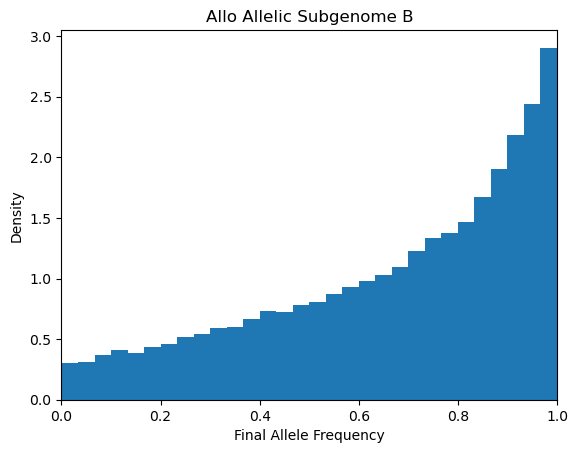

(2, 100000)
Gametic WF Model Results Summary
Subgenome A Results
Proportion of retained density: 0.56527
Mean final allele frequency: 0.3864722168167425
Variance of final allele frequency: 0.09220477740047252


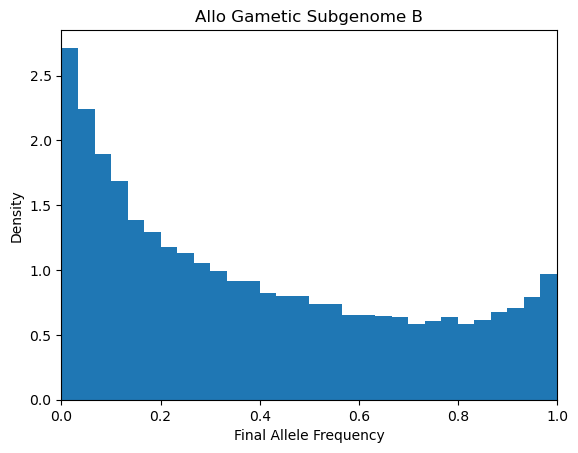

Subgenome B Results
Proportion of retained density: 0.63531
Mean final allele frequency: 0.6723004202672712
Variance of final allele frequency: 0.06979009019500367


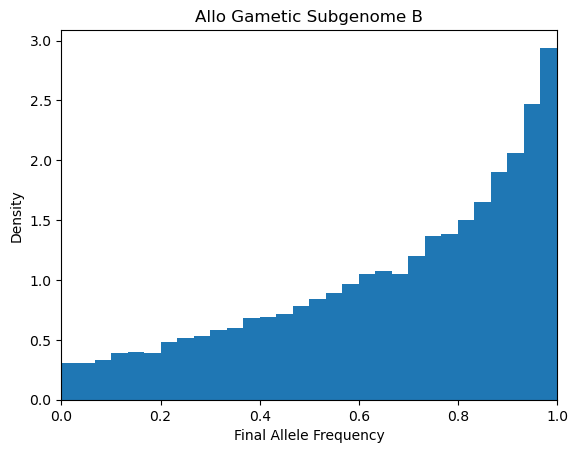

In [ ]:
# let's test the WF models for allotetraploids to ensure the allelic and gametic model agree
# note that, for this, we will assume the rate of HEs parameterized 
# by Blischak et al. (2023) as an exchange parameter is 0

allo_allelic = WF.allo_allelic_WF(N=500, T=.5, E=0, gamma01=-1, gamma10=-1, gamma02=2, gamma11=2, 
                                  gamma20=2, gamma21=-3, gamma12=-3, gamma22=4, 
                                  init_qa = np.full(100000, .3), init_qb = np.full(100000, .7), replicates=100000)

allo_gametic = WF.allo_gametic_WF(N=500, T=.5, gamma01=-1, gamma10=-1, gamma02=2, gamma11=2, 
                                  gamma20=2, gamma21=-3, gamma12=-3, gamma22=4, 
                                  init_qa = np.full(100000, .3), init_qb = np.full(100000, .7), replicates=100000)

# Let's analyze and plot the results for the allelic model
# First, we will want to analyze the frequencies in eah subgenome separately
allelic_a = allo_allelic[0, :]
allelic_b = allo_allelic[1, :]

# "mask" to remove the lost and fixed entries
allelic_a_poly = WF.mask(allelic_a)
allelic_b_poly = WF.mask(allelic_b)

# Calculate some summary statistics
print("Allelic WF Model Results Summary")

print("Subgenome A Results")
print(f"Proportion of retained density: {allelic_a_poly.size/allelic_a.size}")
print(f"Mean final allele frequency: {np.mean(allelic_a_poly)}")
print(f"Variance of final allele frequency: {np.var(allelic_a_poly)}")
# Plot histogram of final allele frequencies
plt.hist(allelic_a_poly, bins = 30, density = True)
plt.xlabel('Final Allele Frequency')
plt.ylabel('Density')
plt.title('Allo Allelic Subgenome A')
plt.xlim(0, 1)
plt.show()

# Let's do the same for the b subgenome
# Calculate some summary statistics
print("Subgenome B Results")
print(f"Proportion of retained density: {allelic_b_poly.size/allelic_b.size}")
print(f"Mean final allele frequency: {np.mean(allelic_b_poly)}")
print(f"Variance of final allele frequency: {np.var(allelic_b_poly)}")
# Plot histogram of final allele frequencies
plt.hist(allelic_b_poly, bins = 30, density = True)
plt.xlabel('Final Allele Frequency')
plt.ylabel('Density')
plt.title('Allo Allelic Subgenome B')
plt.xlim(0, 1)
plt.show()


# Now let's do it all again for the gametic model
# First, we will want to analyze the frequencies in eah subgenome separately
print(allo_gametic.shape)
gametic_a = allo_gametic[0, :]
gametic_b = allo_gametic[1, :]

# "mask" to remove the lost and fixed entries
gametic_a_poly = WF.mask(gametic_a)
gametic_b_poly = WF.mask(gametic_b)

# Calculate some summary statistics
print("Gametic WF Model Results Summary")

print("Subgenome A Results")
print(f"Proportion of retained density: {gametic_a_poly.size/gametic_a.size}")
print(f"Mean final allele frequency: {np.mean(gametic_a_poly)}")
print(f"Variance of final allele frequency: {np.var(gametic_a_poly)}")
# Plot histogram of final allele frequencies
plt.hist(gametic_a_poly, bins = 30, density = True)
plt.xlabel('Final Allele Frequency')
plt.ylabel('Density')
plt.title('Allo Gametic Subgenome A')
plt.xlim(0, 1)
plt.show()

# Let's do the same for the b subgenome
# Calculate some summary statistics
print("Subgenome B Results")
print(f"Proportion of retained density: {gametic_b_poly.size/gametic_b.size}")
print(f"Mean final allele frequency: {np.mean(gametic_b_poly)}")
print(f"Variance of final allele frequency: {np.var(gametic_b_poly)}")
# Plot histogram of final allele frequencies
plt.hist(gametic_b_poly, bins = 30, density = True)
plt.xlabel('Final Allele Frequency')
plt.ylabel('Density')
plt.title('Allo Gametic Subgenome B')
plt.xlim(0, 1)
plt.show()

